INFO:colour_hdri.image:Reading "/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/colour_hdri/examples/resources/IMG_2600.jpg" image.
INFO:colour_hdri.image:Reading "/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/colour_hdri/examples/resources/IMG_2600.jpg" image metadata.
INFO:colour_hdri.exif:Reading '/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/colour_hdri/examples/resources/IMG_2600.jpg' file exif data.
INFO:colour_hdri.image:Reading "/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/colour_hdri/examples/resources/IMG_2601.jpg" image.
INFO:colour_hdri.image:Reading "/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/colour_hdri/examples/resources/IMG_2601.jpg" image metadata.
INFO:colour_hdri.exif:Reading '/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/colour_hdri/examples/resources/IMG_2601.jpg' file exif data.
INFO:colour_hdri.image:Reading "/Users/kelsolaar/Documents/Develop

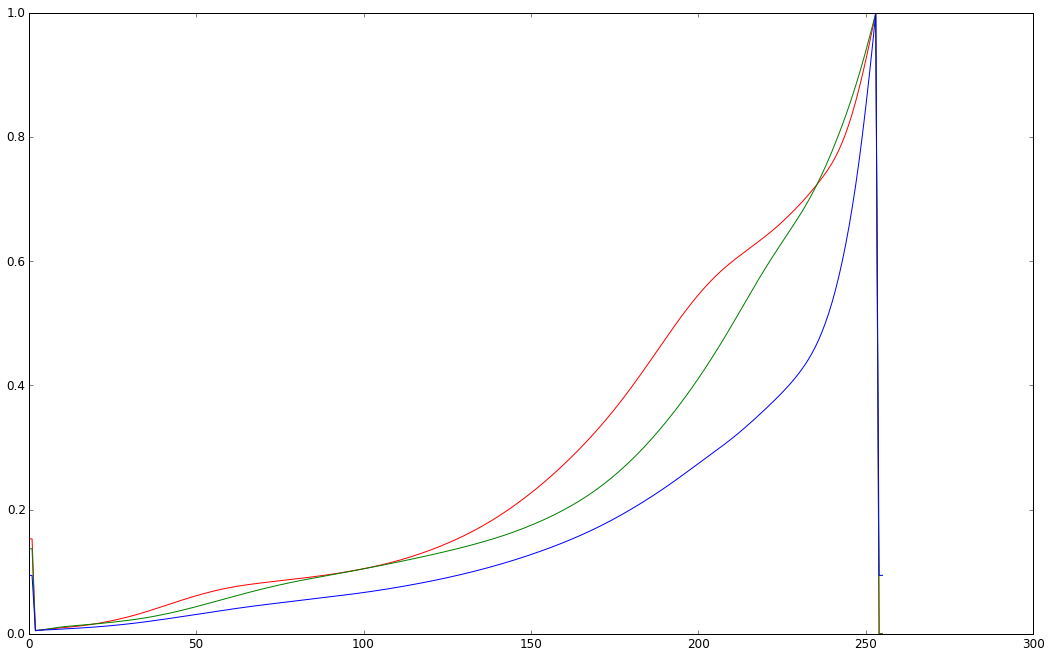

In [1]:
% matplotlib
inline

import glob
import logging
import numpy as np
import os
import pylab
import colour
from colour.plotting import *
from colour_hdri.camera_response_functions import (
    camera_response_function_Debevec1997)
from colour_hdri.image import Image, ImageStack

LOGGER = logging.getLogger()
LOGGER.setLevel(logging.DEBUG)

OECF = colour.RGB_COLOURSPACES['sRGB'].transfer_function

RESOURCES_DIRECTORY = os.path.join(os.getcwd(), 'resources')
JPG_FILES = glob.glob('{0}/*.jpg'.format(RESOURCES_DIRECTORY))


def camera_response_functions(jpg_files):
    image_stack = ImageStack()
    for jpg_file in jpg_files:
        image = Image(jpg_file)
        image.read_data()
        image.read_metadata()
        image_stack.append(image)

    image_stack.data = image_stack.data

    crfs = camera_response_function_Debevec1997(image_stack)
    crfs /= np.max(crfs, axis=0)

    return crfs


CRFS = camera_response_functions(JPG_FILES[2:5])

pylab.plot(CRFS)
pylab.show()